In [15]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# %load '../parameters.ini'
[DATABASE]
ADDRESS=127.0.0.1
USERNAME=root
PASSWORD=12345
NAME=logs

In [ ]:
# %load '../functions/connect_sql.py'
from sqlalchemy import create_engine
import pymysql
import configparser


def sqlalchemy_connect():
    config = configparser.ConfigParser()
    config.read('parameters.ini')
    address = config.get('DATABASE', 'ADDRESS')
    username = config.get('DATABASE', 'USERNAME')
    password = config.get('DATABASE', 'PASSWORD')
    database = config.get('DATABASE', 'NAME')
    return create_engine("mysql+pymysql://{}:{}@{}/{}".format(username, password, address, database))


def pymysql_connect():
    config = configparser.ConfigParser()
    config.read('parameters.ini')
    return pymysql.connect(host=config.get('DATABASE', 'ADDRESS'),
                           user=config.get('DATABASE', 'USERNAME'),
                           passwd=config.get('DATABASE', 'PASSWORD'),
                           db=config.get('DATABASE', 'NAME')
                           )


In [13]:
pymysql_conn = pymysql_connect()

<BarContainer object of 3 artists>

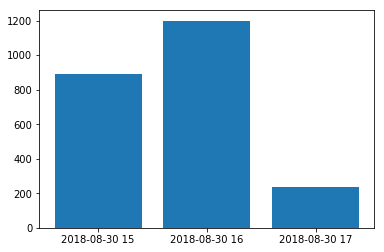

In [27]:
query_error_count = """
SELECT 
    SUBSTRING(DateTime, 1, 13) AS 'DateTime',
    COUNT(*) AS 'ErrorCount'
FROM
    logs
WHERE
    LogType = 'ERROR'
GROUP BY SUBSTRING(DateTime, 1, 13);
"""
df_error_count = pd.read_sql_query(sql=query_error_count, con=pymysql_conn)
plt.bar(df_error_count['DateTime'], df_error_count['ErrorCount'])

In [30]:
query_success = """
SELECT 
    ResponseTime
FROM
    logs
WHERE
    LogType != 'ERROR'
ORDER BY ResponseTime;
"""
df_success = pd.read_sql_query(sql=query_success, con=pymysql_conn)
df_percentile = pd.DataFrame(columns=['Percentile', 'ResponseTime'])
percentile_list = [0.5, 0.9, 0.95]
for percentile in percentile_list:
    df_percentile.loc[len(df_percentile)] = [str(percentile * 100) + '%',
                                             df_success.quantile(percentile).tolist()[0]]
df_percentile

,Percentile,ResponseTime
0,50.0%,258.0
1,90.0%,442.6
2,95.0%,472.0
